<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="small_images.jpg" />

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

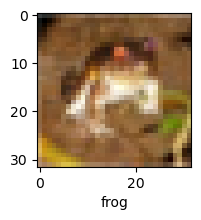

In [12]:
plot_sample(X_train, y_train, 0)

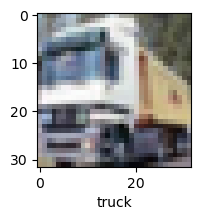

In [13]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [15]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)



Epoch 1/5


1563/1563 [==============================] - 60s 38ms/step - loss: 1.8089 - accuracy: 0.3538
Epoch 2/5
1563/1563 [==============================] - 60s 39ms/step - loss: 1.6218 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5415 - accuracy: 0.4542
Epoch 4/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4811 - accuracy: 0.4773
Epoch 5/5
1563/1563 [==============================] - 60s 39ms/step - loss: 1.4295 - accuracy: 0.4962


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.33      0.45      1000
           1       0.69      0.54      0.60      1000
           2       0.29      0.56      0.38      1000
           3       0.39      0.32      0.35      1000
           4       0.35      0.43      0.39      1000
           5       0.49      0.29      0.36      1000
           6       0.51      0.54      0.52      1000
           7       0.63      0.45      0.53      1000
           8       0.54      0.70      0.61      1000
           9       0.55      0.61      0.58      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 19s 11ms/step - loss: 1.4769 - accuracy: 0.4702
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1225 - accuracy: 0.6081
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9871 - accuracy: 0.6549
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9001 - accuracy: 0.6877
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8289 - accuracy: 0.7132
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7727 - accuracy: 0.7306
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7242 - accuracy: 0.7467
Epoch 8/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6799 - accuracy: 0.7622
Epoch 9/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6381 - accuracy: 0.7797
Epoch 10/10
1563/1563 [==============================] - 18s 12m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9386 - accuracy: 0.6949


[0.9385949373245239, 0.6948999762535095]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[2.6469927e-03, 5.6363754e-03, 1.8404857e-03, 7.5852633e-01,
        1.8573371e-03, 2.2517309e-01, 2.4809062e-03, 9.0281601e-04,
        6.7545869e-04, 2.6026714e-04],
       [2.4192207e-02, 8.6716391e-02, 8.5725933e-06, 3.0315434e-08,
        1.5213922e-09, 1.4581341e-11, 2.0960063e-09, 4.1581738e-11,
        8.8438952e-01, 4.6932320e-03],
       [4.8274103e-01, 1.7365240e-01, 4.0107383e-03, 2.3934864e-03,
        5.0562066e-05, 3.1276988e-05, 2.4294978e-04, 1.5485591e-04,
        3.2968009e-01, 7.0427349e-03],
       [6.8685091e-01, 1.1573736e-02, 8.0292765e-04, 1.3334451e-03,
        1.0319067e-02, 3.1616433e-05, 4.5715336e-04, 5.1903730e-06,
        2.8851932e-01, 1.0650213e-04],
       [9.6185664e-05, 4.7080775e-05, 5.6997210e-02, 2.7196782e-02,
        6.5739237e-02, 6.4189001e-03, 8.4344602e-01, 3.8845032e-05,
        1.8379093e-05, 1.3092043e-06]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 6]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

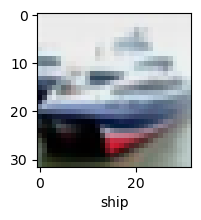

In [40]:
plot_sample(X_test, y_test,1)

In [41]:
classes[y_classes[1]]

'ship'

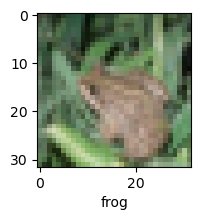

In [38]:
plot_sample(X_test, y_test,4)

In [39]:
classes[y_classes[4]]

'frog'